###  선택된 피쳐로 데이터 불러오기

In [2]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,  LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
import joblib
import pickle

data = pd.read_excel("./DB_0531_1740(태환).xlsx")

data.fillna(0, inplace=True)
column_list=['유동비율', '부채비율',  'new_시총', '영업이익률', 'ROA', 
       '총자산회전율',  '매출액증가율',  '총자산증가율','new_평균근속연수' 
,'new_기업존속연수', '비정규직비율', '여성고용률', "자산/기말인원"]

x = data[column_list]
st = StandardScaler()
x= st.fit_transform(x)
x=pd.DataFrame(x, columns=column_list)
df_17_20 = x[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
df_21 = x[data['회계년도'] == 2021] #validate
y = data['K1_Score_ad']
y = y.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)
y_17_20=y[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
y_21 = y[data['회계년도'] == 2021] #validate
X_train=df_17_20
X_test=df_21
y_train=y_17_20
y_test =y_21



# 언더샘플링
X_train_samp, y_train_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_train, y_train)
# X_test_samp,y_test_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_test, y_test)


# X_train_samp= st.fit_transform(X_train_samp)
# X_test_samp= st.fit_transform(X_test)

In [3]:
#샘플링으로 변화된 값 확인 
print("y_train 레이블 분포(%)")
print(y_train.value_counts() / y_train.count() * 100)
print("-"*30)
print("X_train_samp 레이블 분포(%)")
print(y_train_samp.value_counts() / y_train_samp.count() * 100)

y_train 레이블 분포(%)
0    85.452163
1    14.547837
Name: K1_Score_ad, dtype: float64
------------------------------
X_train_samp 레이블 분포(%)
0    53.1151
1    46.8849
Name: K1_Score_ad, dtype: float64


### 머신러닝 모델링 최적 하이퍼 파라미터에 따른 Best Score 확인

* 총 11가지의 분류 모델을 GridSearch cv를 통해 최적 파라미터를 찾고 교차검증을 실시하여 

* 각 분류 모델은 중요하게 여겨지는 파라미터들로 구성되어 있습니다.

* 또한 임계점에 따른 정확도, 정밀도, 재현율, f1-score을 확인 할 수 있습니다.

모델명: DecisionTreeClassifier
학습 데이터 최적 파라미터: {'max_depth': 3, 'min_samples_split': 5}
학습 데이터 최고 정확도: 0.685
예측 정확도: 0.813


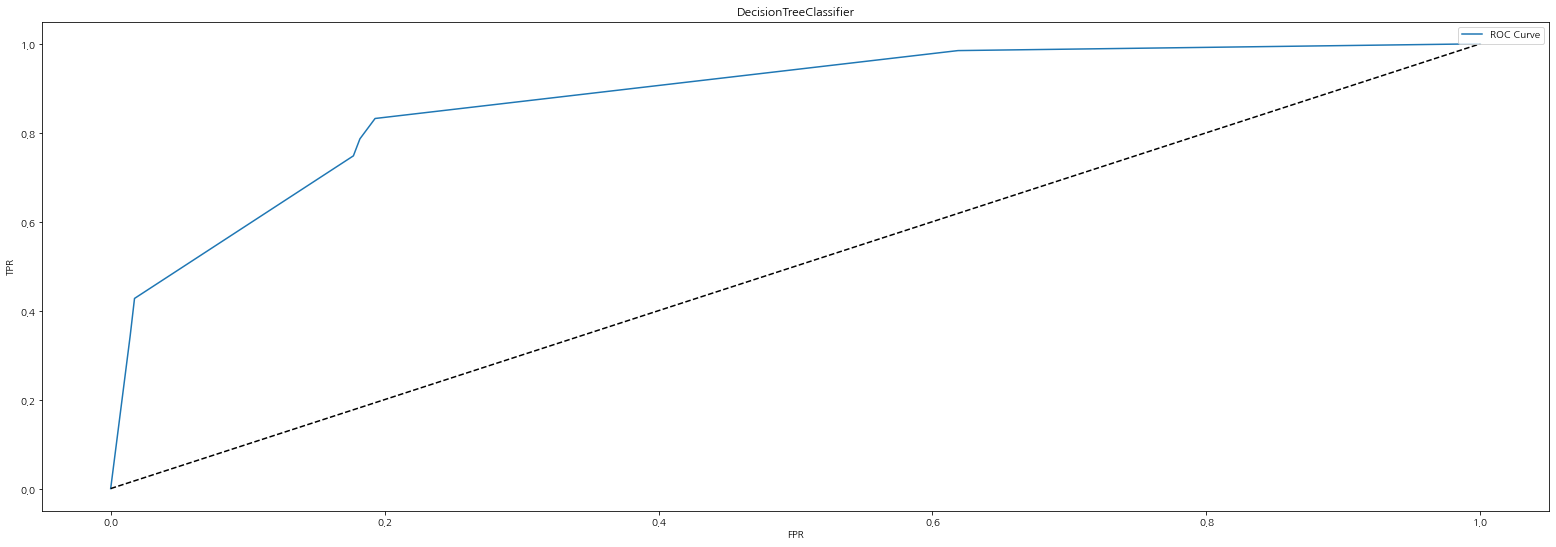

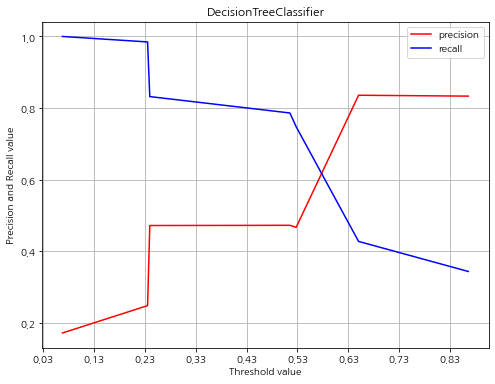

{'max_depth': 3, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=3, min_samples_split=5)
                     models  Accuracy  Precision   Recall  F1 score  Auc_Score
0.5  DecisionTreeClassifier     0.813   0.472477  0.78626  0.590258   0.875266
모델명: RandomForestClassifier
학습 데이터 최적 파라미터: {'max_depth': 9, 'min_samples_split': 11}
학습 데이터 최고 정확도: 0.728
예측 정확도: 0.898


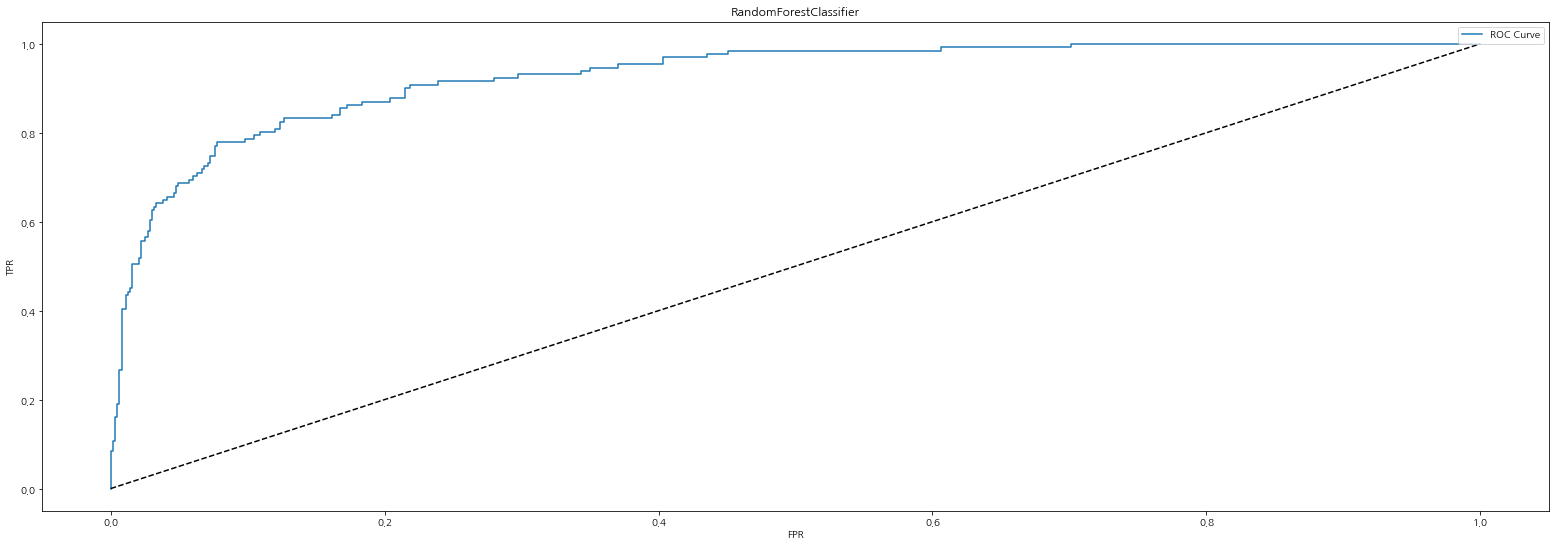

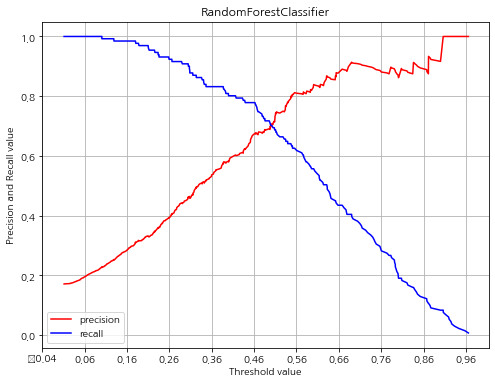

{'max_depth': 9, 'min_samples_split': 11}
RandomForestClassifier(max_depth=9, min_samples_split=11)
                     models  Accuracy  Precision   Recall  F1 score  Auc_Score
0.5  DecisionTreeClassifier     0.813   0.472477  0.78626  0.590258   0.875266
0.5  RandomForestClassifier     0.898   0.702290  0.70229  0.702290   0.926587
모델명: LogisticRegression
학습 데이터 최적 파라미터: {'C': 5, 'penalty': 'l2'}
학습 데이터 최고 정확도: 0.714
예측 정확도: 0.889


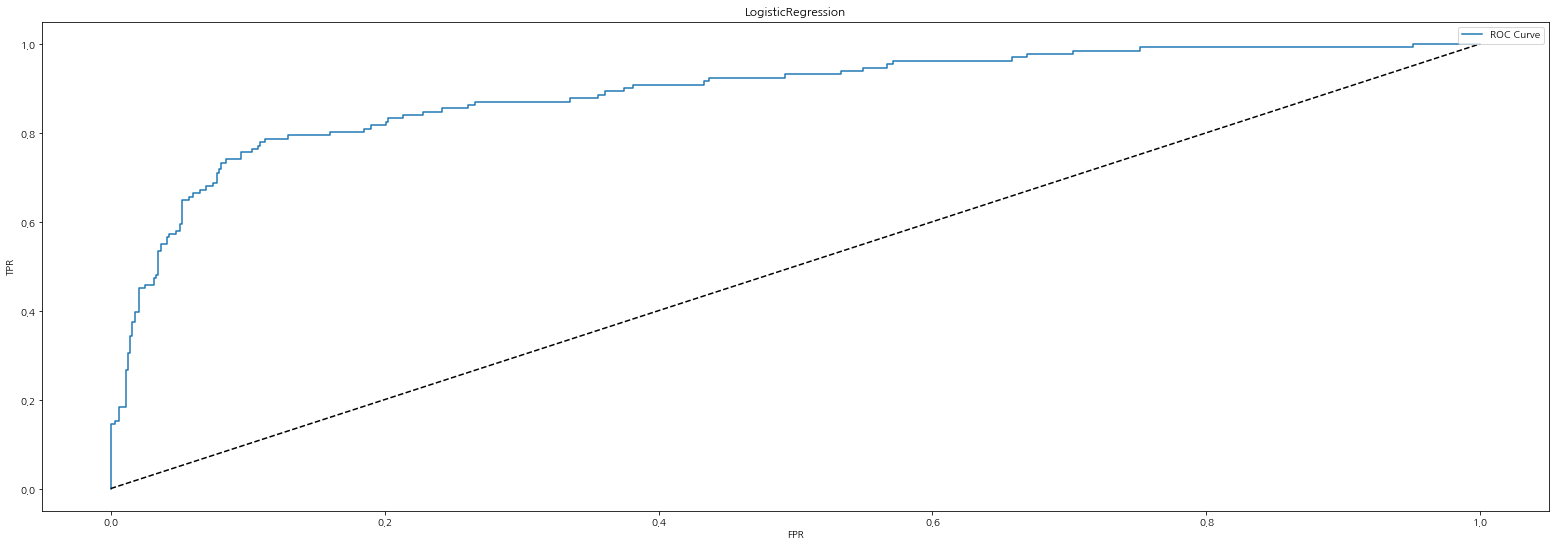

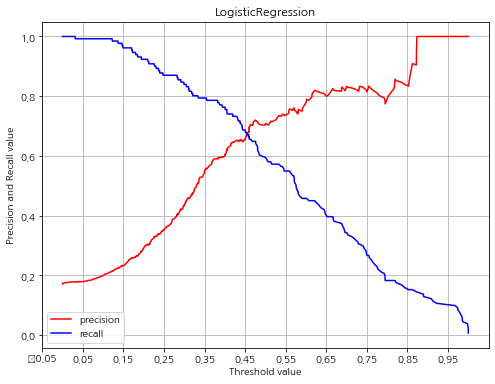

{'C': 5, 'penalty': 'l2'}
LogisticRegression(C=5)
                     models  Accuracy  Precision   Recall  F1 score  Auc_Score
0.5  DecisionTreeClassifier     0.813   0.472477  0.78626  0.590258   0.875266
0.5  RandomForestClassifier     0.898   0.702290  0.70229  0.702290   0.926587
0.5      LogisticRegression     0.889   0.709091  0.59542  0.647303   0.889096
모델명: AdaBoostClassifier
학습 데이터 최적 파라미터: {'learning_rate': 0.01, 'n_estimators': 4000}
학습 데이터 최고 정확도: 0.718
예측 정확도: 0.882


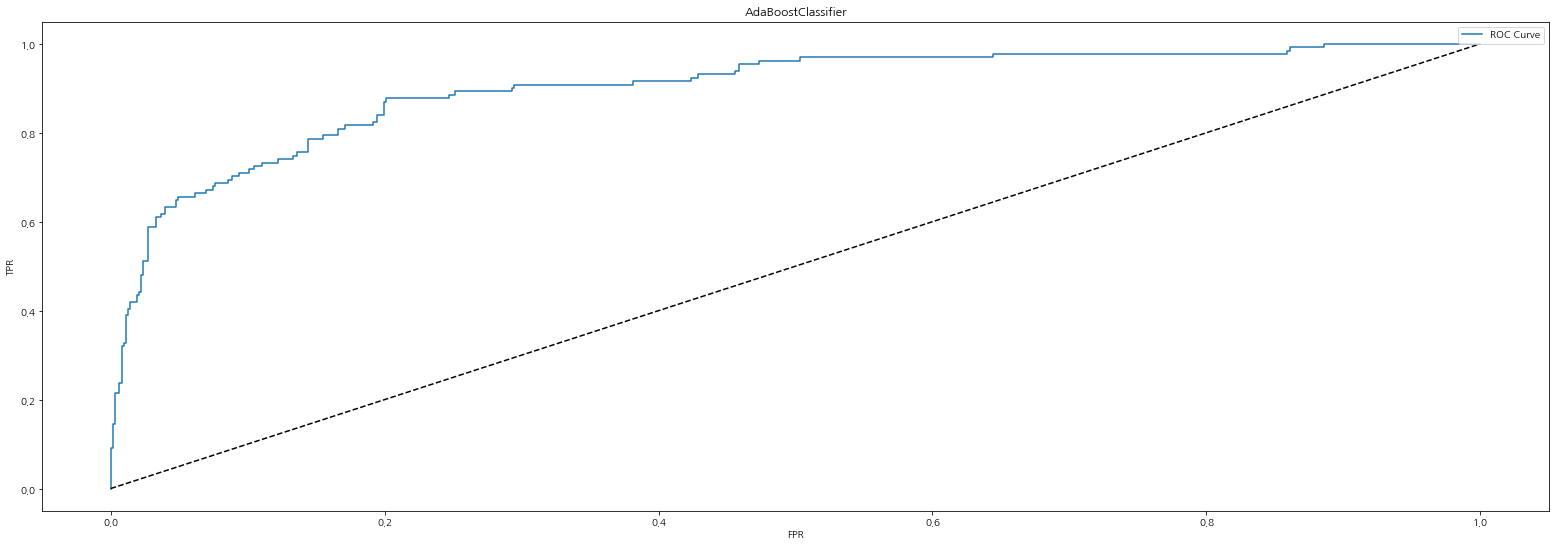

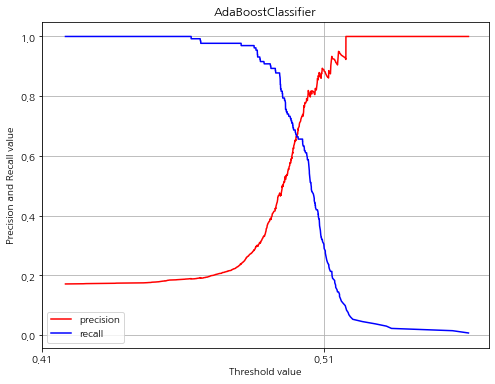

{'learning_rate': 0.01, 'n_estimators': 4000}
AdaBoostClassifier(learning_rate=0.01, n_estimators=4000, random_state=0)
                     models  Accuracy  Precision    Recall  F1 score  \
0.5  DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5  RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5      LogisticRegression     0.889   0.709091  0.595420  0.647303   
0.5      AdaBoostClassifier     0.882   0.651852  0.671756  0.661654   

     Auc_Score  
0.5   0.875266  
0.5   0.926587  
0.5   0.889096  
0.5   0.899398  
모델명: GradientBoostingClassifier
학습 데이터 최적 파라미터: {'learning_rate': 0.001, 'n_estimators': 2000}
학습 데이터 최고 정확도: 0.717
예측 정확도: 0.883


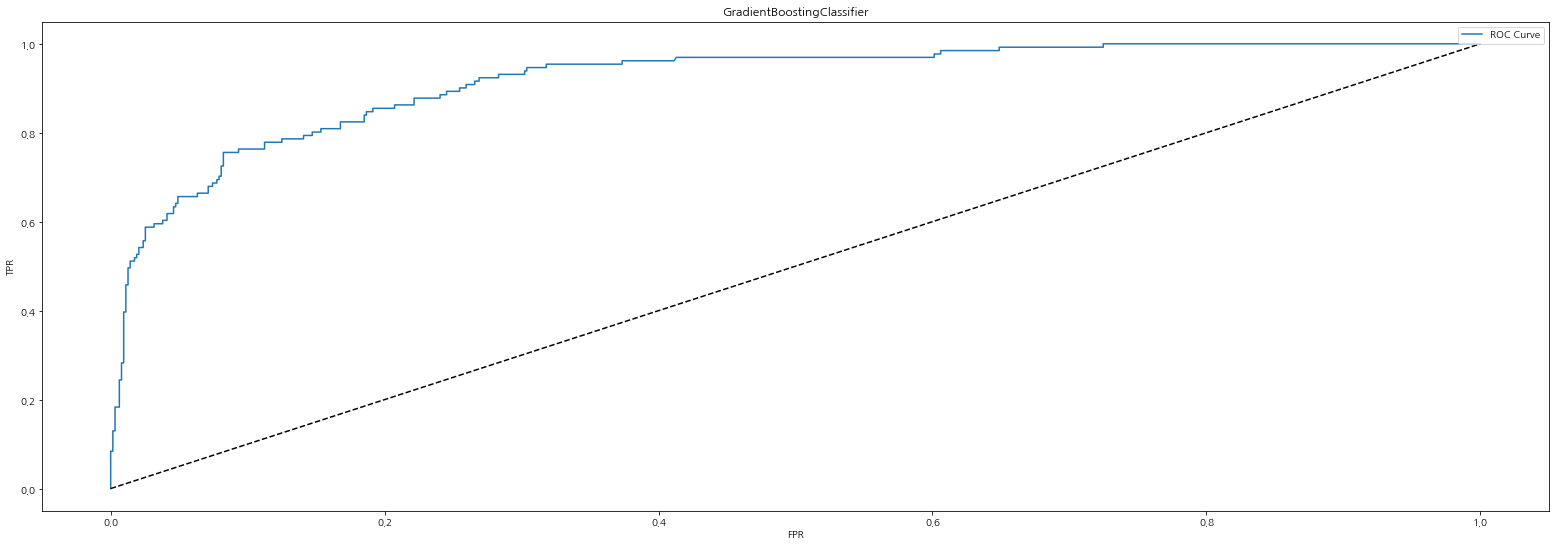

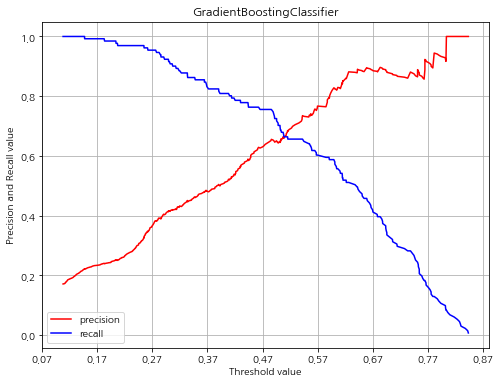

{'learning_rate': 0.001, 'n_estimators': 2000}
GradientBoostingClassifier(learning_rate=0.001, n_estimators=2000,
                           random_state=0)
                         models  Accuracy  Precision    Recall  F1 score  \
0.5      DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5      RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5          LogisticRegression     0.889   0.709091  0.595420  0.647303   
0.5          AdaBoostClassifier     0.882   0.651852  0.671756  0.661654   
0.5  GradientBoostingClassifier     0.883   0.647887  0.702290  0.673993   

     Auc_Score  
0.5   0.875266  
0.5   0.926587  
0.5   0.889096  
0.5   0.899398  
0.5   0.917595  
[11:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to 

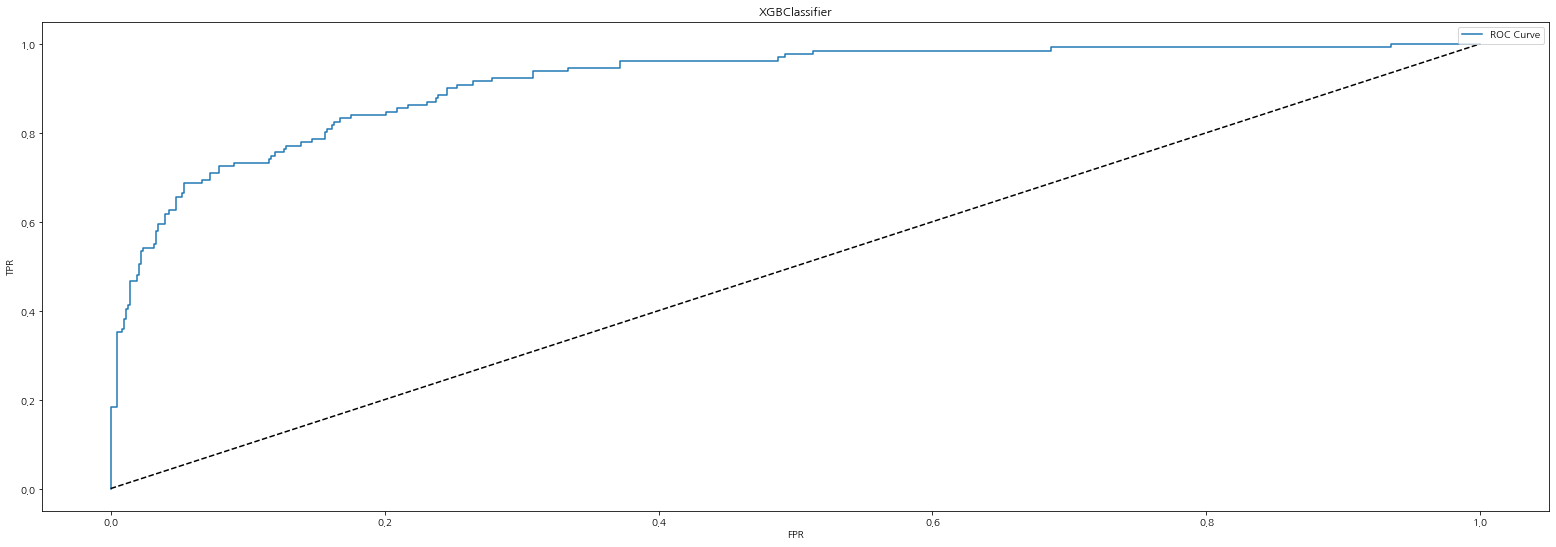

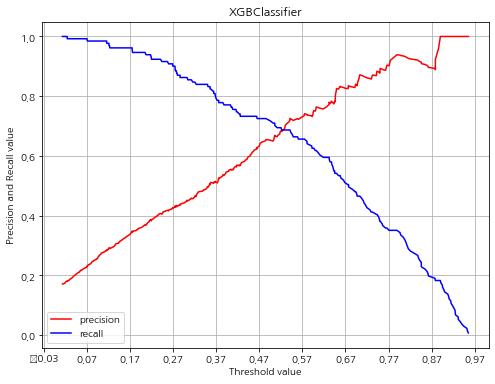

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 4000}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=4000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
                         models  Accuracy  Precision    Recall  F1 score  \
0.5      DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5      RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5          LogisticRegression     0.889   0.709091  0.595420  0.647303   


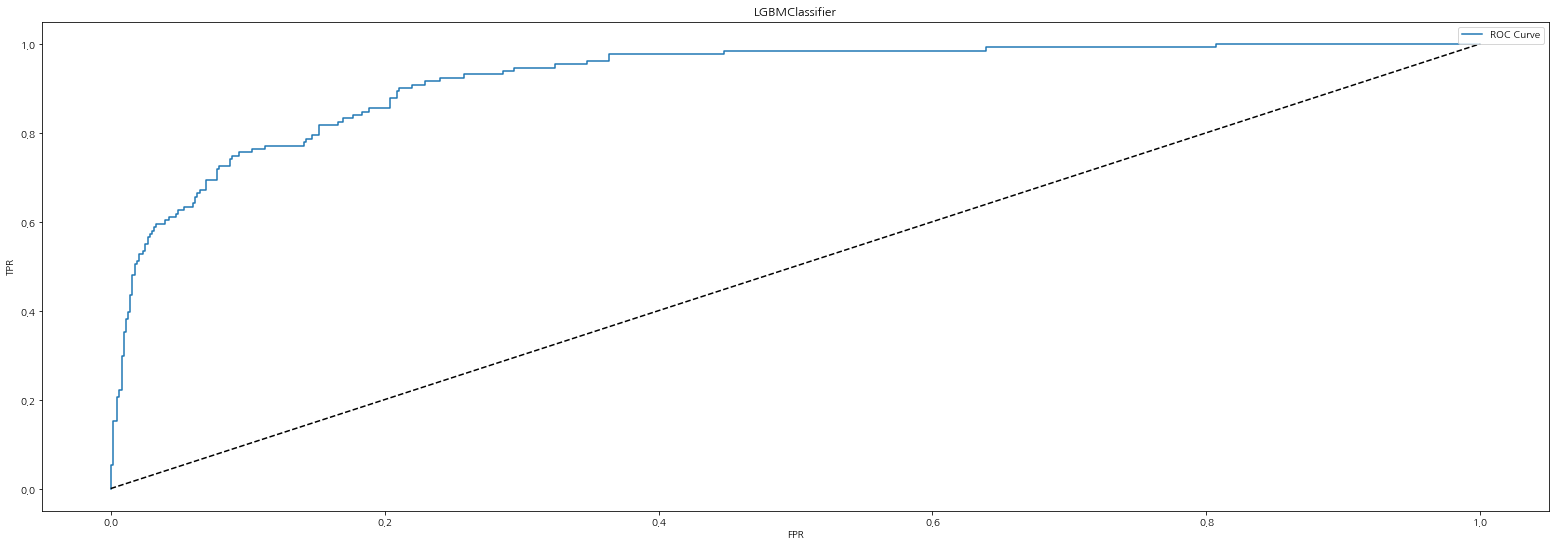

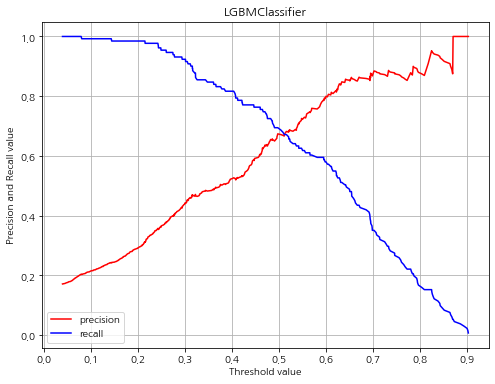

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 3000}
LGBMClassifier(learning_rate=0.001, max_depth=3, n_estimators=3000,
               random_state=0)
                         models  Accuracy  Precision    Recall  F1 score  \
0.5      DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5      RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5          LogisticRegression     0.889   0.709091  0.595420  0.647303   
0.5          AdaBoostClassifier     0.882   0.651852  0.671756  0.661654   
0.5  GradientBoostingClassifier     0.883   0.647887  0.702290  0.673993   
0.5               XGBClassifier     0.885   0.650350  0.709924  0.678832   
0.5              LGBMClassifier     0.889   0.671642  0.687023  0.679245   

     Auc_Score  
0.5   0.875266  
0.5   0.926587  
0.5   0.889096  
0.5   0.899398  
0.5   0.917595  
0.5   0.914352  
0.5   0.921514  
모델명: CatBoostClassifier
학습 데이터 최적 파라미터: {'depth': 4, 'eval_metric': 'Accuracy', 'iterations':

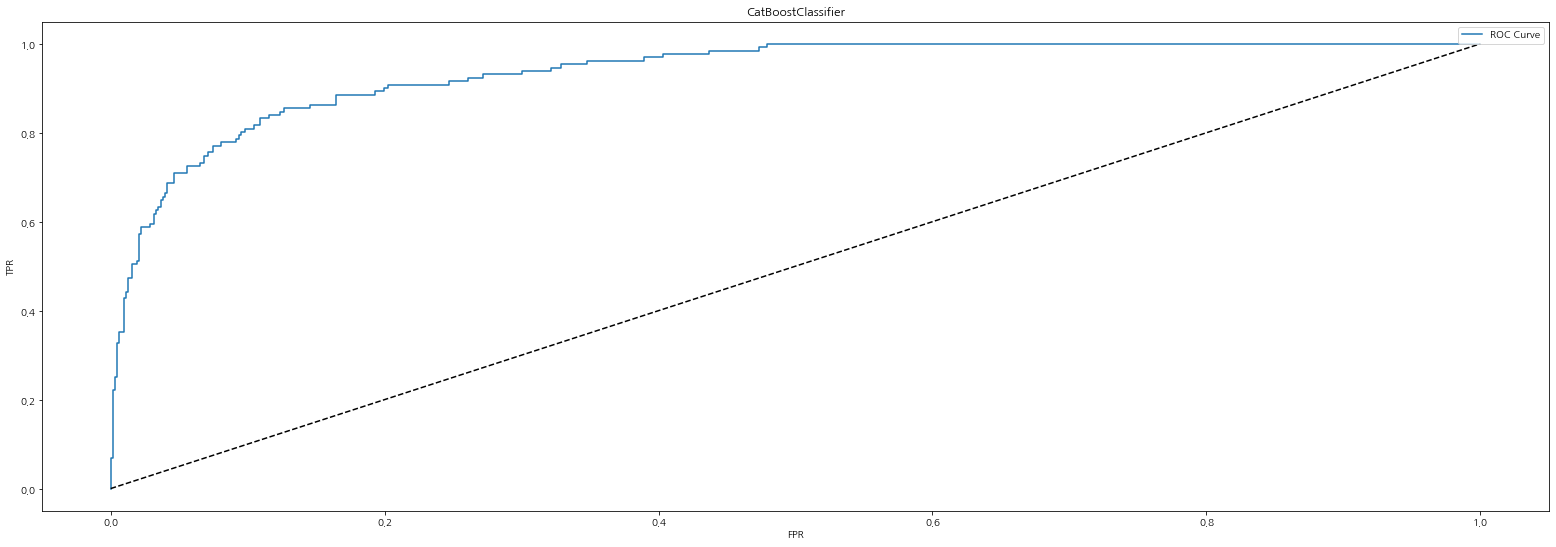

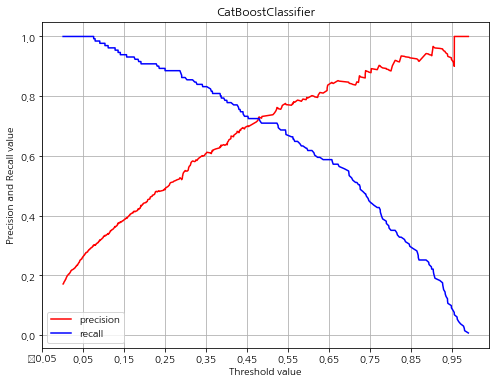

{'depth': 4, 'eval_metric': 'Accuracy', 'iterations': 700, 'leaf_estimation_iterations': 10, 'logging_level': 'Silent', 'loss_function': 'MultiClass'}
                         models  Accuracy  Precision    Recall  F1 score  \
0.5      DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5      RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5          LogisticRegression     0.889   0.709091  0.595420  0.647303   
0.5          AdaBoostClassifier     0.882   0.651852  0.671756  0.661654   
0.5  GradientBoostingClassifier     0.883   0.647887  0.702290  0.673993   
0.5               XGBClassifier     0.885   0.650350  0.709924  0.678832   
0.5              LGBMClassifier     0.889   0.671642  0.687023  0.679245   
0.5          CatBoostClassifier     0.907   0.738095  0.709924  0.723735   

     Auc_Score  
0.5   0.875266  
0.5   0.926587  
0.5   0.889096  
0.5   0.899398  
0.5   0.917595  
0.5   0.914352  
0.5   0.921514  
0.5   0.936286  
모델명: KNeigh

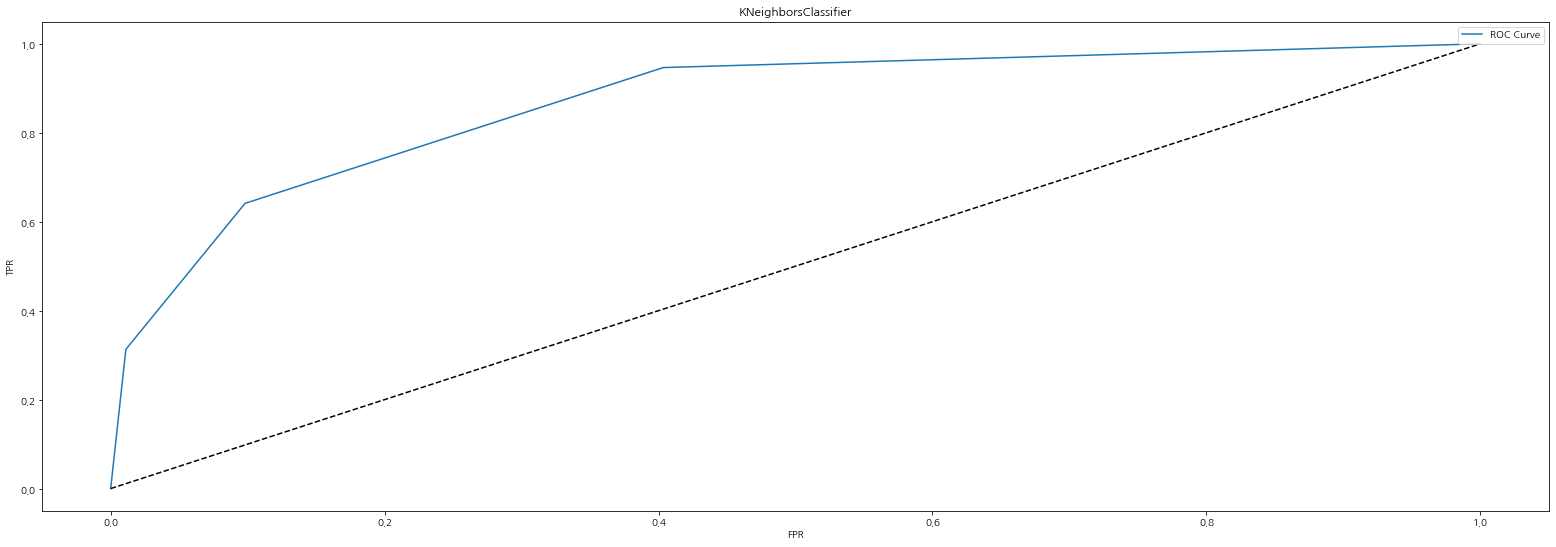

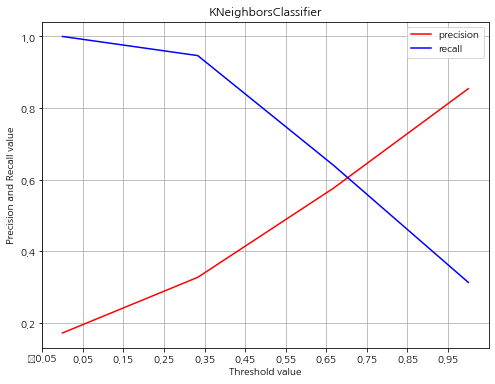

{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)
                         models  Accuracy  Precision    Recall  F1 score  \
0.5      DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5      RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5          LogisticRegression     0.889   0.709091  0.595420  0.647303   
0.5          AdaBoostClassifier     0.882   0.651852  0.671756  0.661654   
0.5  GradientBoostingClassifier     0.883   0.647887  0.702290  0.673993   
0.5               XGBClassifier     0.885   0.650350  0.709924  0.678832   
0.5              LGBMClassifier     0.889   0.671642  0.687023  0.679245   
0.5          CatBoostClassifier     0.907   0.738095  0.709924  0.723735   
0.5        KNeighborsClassifier     0.857   0.575342  0.641221  0.606498   

     Auc_Score  
0.5   0.875266  
0.5   0.926587  
0.5   0.889096  
0.5   0.899398  
0.5   0.917595  
0.5   0.914352  
0.5   0.921514  
0.5   0.936286  
0.5   0.866273  
모델명: GaussianP

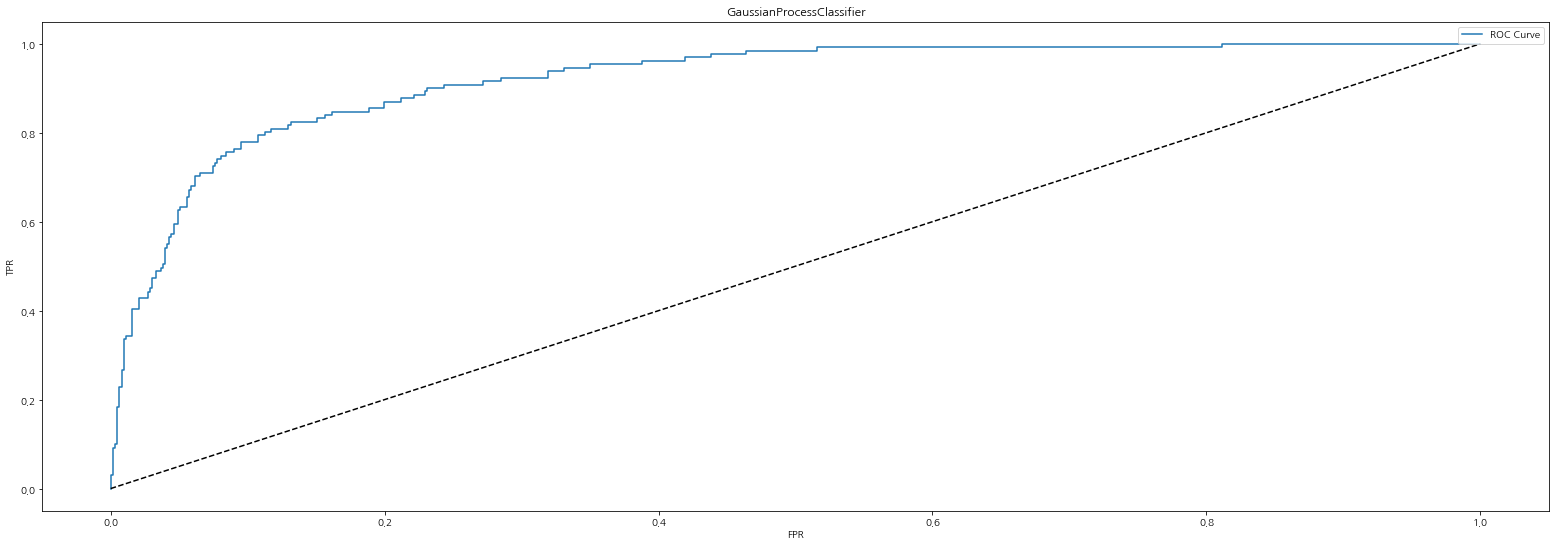

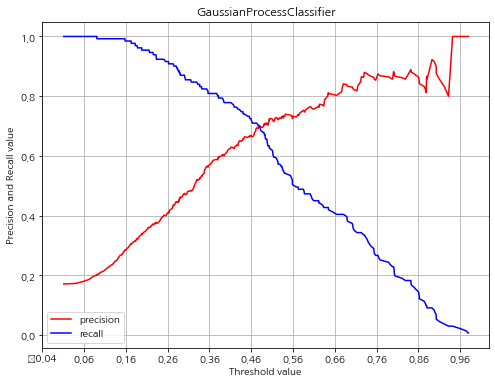

{'kernel': 1**2 * RBF(length_scale=1)}
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=0)
                         models  Accuracy  Precision    Recall  F1 score  \
0.5      DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5      RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5          LogisticRegression     0.889   0.709091  0.595420  0.647303   
0.5          AdaBoostClassifier     0.882   0.651852  0.671756  0.661654   
0.5  GradientBoostingClassifier     0.883   0.647887  0.702290  0.673993   
0.5               XGBClassifier     0.885   0.650350  0.709924  0.678832   
0.5              LGBMClassifier     0.889   0.671642  0.687023  0.679245   
0.5          CatBoostClassifier     0.907   0.738095  0.709924  0.723735   
0.5        KNeighborsClassifier     0.857   0.575342  0.641221  0.606498   
0.5   GaussianProcessClassifier     0.893   0.709402  0.633588  0.669355   

     Auc_Score  
0.5   0.875266  
0.5   0.92658

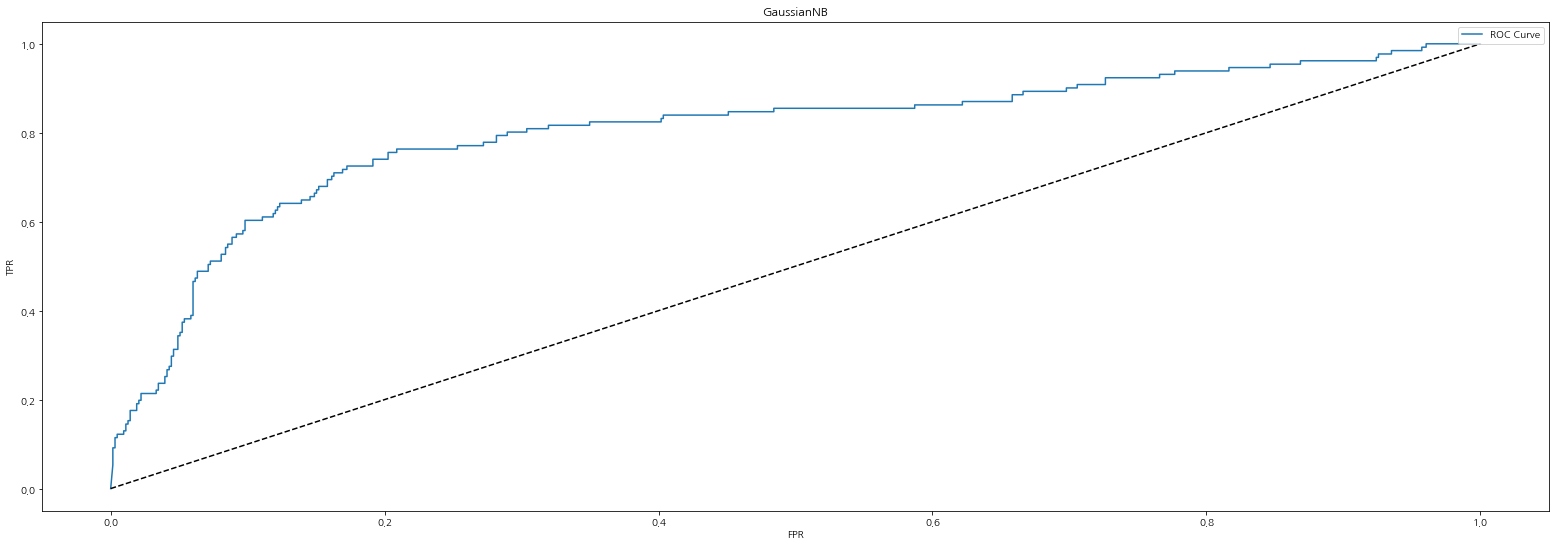

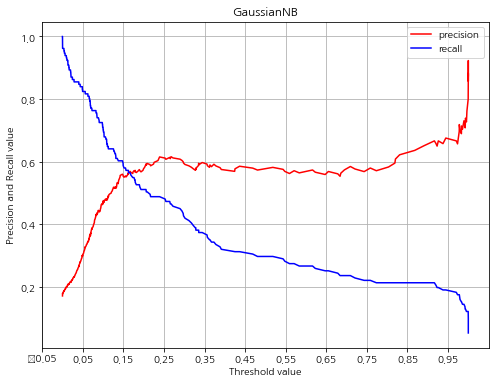

{}
GaussianNB()
                         models  Accuracy  Precision    Recall  F1 score  \
0.5      DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5      RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5          LogisticRegression     0.889   0.709091  0.595420  0.647303   
0.5          AdaBoostClassifier     0.882   0.651852  0.671756  0.661654   
0.5  GradientBoostingClassifier     0.883   0.647887  0.702290  0.673993   
0.5               XGBClassifier     0.885   0.650350  0.709924  0.678832   
0.5              LGBMClassifier     0.889   0.671642  0.687023  0.679245   
0.5          CatBoostClassifier     0.907   0.738095  0.709924  0.723735   
0.5        KNeighborsClassifier     0.857   0.575342  0.641221  0.606498   
0.5   GaussianProcessClassifier     0.893   0.709402  0.633588  0.669355   
0.5                  GaussianNB     0.843   0.582090  0.297710  0.393939   

     Auc_Score  
0.5   0.875266  
0.5   0.926587  
0.5   0.889096  
0.5

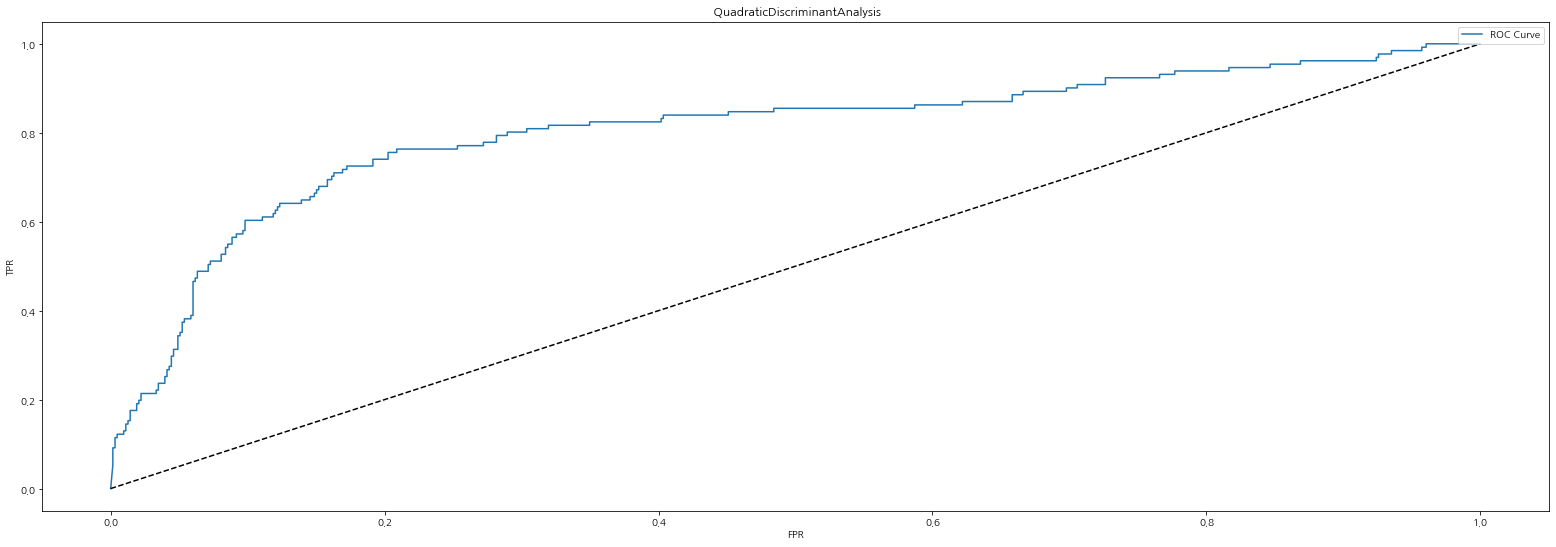

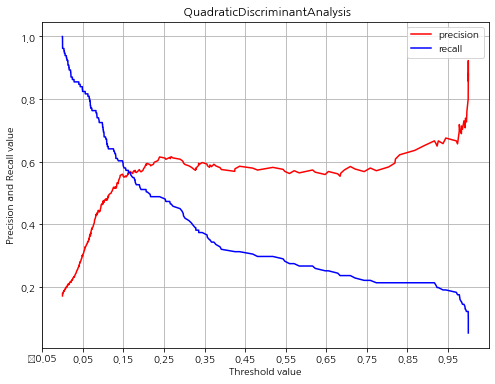

{}
GaussianNB()
                             models  Accuracy  Precision    Recall  F1 score  \
0.5          DecisionTreeClassifier     0.813   0.472477  0.786260  0.590258   
0.5          RandomForestClassifier     0.898   0.702290  0.702290  0.702290   
0.5              LogisticRegression     0.889   0.709091  0.595420  0.647303   
0.5              AdaBoostClassifier     0.882   0.651852  0.671756  0.661654   
0.5      GradientBoostingClassifier     0.883   0.647887  0.702290  0.673993   
0.5                   XGBClassifier     0.885   0.650350  0.709924  0.678832   
0.5                  LGBMClassifier     0.889   0.671642  0.687023  0.679245   
0.5              CatBoostClassifier     0.907   0.738095  0.709924  0.723735   
0.5            KNeighborsClassifier     0.857   0.575342  0.641221  0.606498   
0.5       GaussianProcessClassifier     0.893   0.709402  0.633588  0.669355   
0.5                      GaussianNB     0.843   0.582090  0.297710  0.393939   
0.5   QuadraticDiscrimin

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from catboost import CatBoostClassifier


df = pd.DataFrame(columns =['models','Accuracy','Precision', 'Recall', 'F1 score','Auc_Score'])

list = ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression","AdaBoostClassifier", "GradientBoostingClassifier", 
        "XGBClassifier", "LGBMClassifier","CatBoostClassifier","KNeighborsClassifier", "GaussianProcessClassifier", "GaussianNB", " QuadraticDiscriminantAnalysis"]
for i in list:

# def grid(i):
  
  
  if i == "DecisionTreeClassifier":
      
      dt = DecisionTreeClassifier()
      parameters = [{"max_depth": [3,5,7,9,11], "min_samples_split":[3,5,7,9,11]}]
      
  elif i == "RandomForestClassifier":
      
      dt = RandomForestClassifier()
      parameters = [{"max_depth": [3,5,7,9,11], "min_samples_split":[3,5,7,9,11]}]
      
  elif i == "LogisticRegression":
        
        dt = LogisticRegression()
        parameters = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 5, 10]}
        
#   elif i == "Linear SVM": 
#          dt = SVC(probability=True)
#          parameters = [{'kernel':['linear'], 'C':[0.025]}]
         
#   elif i == "RBF SVM": 
#          dt = SVC(probability=True)
#          parameters = [{'gamma':[2],'C':[1]}]

               

  elif i == "AdaBoostClassifier":
        dt= AdaBoostClassifier(random_state=0)
        parameters={'n_estimators':[1000, 1500,2000,3000,4000],'learning_rate':[0.01, 0.1, 0.001,1]}
        
  elif i == "GradientBoostingClassifier":
        dt=GradientBoostingClassifier(random_state=0)
        parameters = {
          'n_estimators' : [1000, 1500,2000,3000,4000],
          'learning_rate' : [0.01, 0.1, 0.001,1]
                  }
  # n_estimators':[1000, 1500,2000,3000,4000],      
  if i == "XGBClassifier":
        dt=XGBClassifier(random_state=0)
        parameters={'n_estimators':[1000, 1500,2000,3000,4000], 'learning_rate':[0.01, 0.1, 0.001,1], 'max_depth':[3,5,7,9,11]}
        
  elif i == "LGBMClassifier":
        dt=LGBMClassifier(random_state=0)
        parameters={'n_estimators':[1000, 1500,2000,3000,4000], 'learning_rate':[0.01, 0.1, 0.001,1] , 'max_depth':[3,5,7,9,11]}
        
  elif i == "CatBoostClassifier":
        dt=CatBoostClassifier(random_state=0)
        parameters={'iterations': [600, 700, 800, 900, 1000],
          'depth': [4, 5, 6],
          'loss_function': ['MultiClass'],
          # 'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
           'eval_metric': ['Accuracy'],
          'logging_level':['Silent']
         }
  
  elif i == "KNeighborsClassifier":
        dt = KNeighborsClassifier()
        parameters = {'n_neighbors':[3]}
       
  elif i == 'MLPClassifier':
        dt = MLPClassifier(random_state=0)
        parameters={'max_iter':[1000], 'hidden_layer_sizes':[1], 'activation':['logistic'],
                    'solver':['sgd'], 'alpha':[0.01], 'batch_size':[32],
                    'learning_rate_init':[0.1], 'max_iter':[500]}
        
  elif i == 'GaussianProcessClassifier':
        dt = GaussianProcessClassifier(random_state=0)
        parameters={'kernel': [1.0*RBF(1.0)]}
        
  elif i == 'GaussianNB':
        dt = GaussianNB()
        parameters={}
        
  
  elif i =='QuadraticDiscriminantAnalysis':
        dt = QuadraticDiscriminantAnalysis()
        parameters={}
        
  
  figure = plt.figure(figsize=(27, 9))

  grid_dt  = GridSearchCV(dt, param_grid = parameters, cv=5, refit =True, n_jobs=-1)
  grid_dt.fit(X_train_samp, y_train_samp )
  
  print("모델명: %s" %i)
  print(f"학습 데이터 최적 파라미터: {grid_dt.best_params_}")
  print(f"학습 데이터 최고 정확도: {grid_dt.best_score_:.3f}")

  estimator = grid_dt.best_estimator_
  y_pred = pd.DataFrame(estimator.predict(X_test))
  y_pred_probability = pd.DataFrame(estimator.predict_proba(X_test))
  print(f"예측 정확도: {accuracy_score(y_test, y_pred):.3f}")

  prediction = pd.concat([y_pred_probability, y_pred], axis = 1)

  prediction.columns = ["Negative(0)", "Positive(1)", "y_pred"]
  
  # prediction.to_csv("../datasets/predictproba/{}.csv".format(i),index = False)
  pred_proba_1 = np.array(prediction["Positive(1)"]).reshape(-1, 1)
  b= round(accuracy_score(y_test, y_pred),3)
  FPRs, TPRs, thresholds = roc_curve(y_test, pred_proba_1)
  


  thresholds = [0.5]
  
#   thresholds = [0.5]

  def get_f1_score(y_test, pred_proba_1,thresholds):
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores=[]
   

    for threshold in thresholds:
          
          

      binarizer = Binarizer(threshold = threshold)
      # 임계점 지정하여 Binariazer() 객체 생성
      pred_proba = binarizer.fit_transform(pred_proba_1)
      # 임계점을 기준으로 데이터 변환

      precision = precision_score(y_test, pred_proba)
      recall = recall_score(y_test, pred_proba)
      f1score = f1_score(y_test, pred_proba)
      auc_score=roc_auc_score(y_test, pred_proba_1)

      precisions.append(precision)
      recalls.append(recall)
      f1_scores.append(f1score)
      auc_scores.append(auc_score)
    results = pd.DataFrame(data = {"models":i,"Accuracy":b,"Precision": precisions,
                                  "Recall": recalls,
                                  "F1 score": f1_scores,"Auc_Score":auc_scores}, index = thresholds)
    

    results.sort_values("F1 score", ascending=False, inplace=True)
    new_model_df= results.iloc[:1]
    global df
    df = pd.concat([df,new_model_df])

    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)
      

    plt.plot(FPRs, TPRs, label = "ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlabel("FPR")
            # x축명
    plt.ylabel("TPR")
            # y축명
    plt.title(i)
    plt.legend()

    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
      # threshold의 구간이 몇 개로 나뉘어져 있는지 확인
    plt.plot(thresholds, precisions[0:threshold_boundary], color = "red", label = "precision")
      # x축이 threshold, y축이 precision인 그래프
    plt.plot(thresholds, recalls[0:threshold_boundary], color = "blue", label = "recall")

    start, end = plt.xlim()
      # x축과 y축의 범위를 얻어 각각 start와 end로 반환
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
      # x축의 눈금을 start부터 end까지 0.1 간격으로 표시

    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.title(i)
    plt.legend()
    plt.grid()
    plt.show()
    print(grid_dt.best_params_)
    print(grid_dt.best_estimator_)
 
    return df
  print(get_f1_score(y_test, pred_proba_1,thresholds))
  
  print("="*80)


In [30]:
df1=df.reset_index(drop=False)
df2=df1.set_index("models")
df2.rename(columns={"index":"threshold"}, inplace=True)
df2.style.highlight_max(axis=0,color='blue')

,threshold,Accuracy,Precision,Recall,F1 score,Auc_Score
models,,,,,,
DecisionTreeClassifier,0.500000,0.813000,0.472477,0.786260,0.590258,0.875266
RandomForestClassifier,0.500000,0.898000,0.702290,0.702290,0.702290,0.926587
LogisticRegression,0.500000,0.889000,0.709091,0.595420,0.647303,0.889096
AdaBoostClassifier,0.500000,0.882000,0.651852,0.671756,0.661654,0.899398
GradientBoostingClassifier,0.500000,0.883000,0.647887,0.702290,0.673993,0.917595
XGBClassifier,0.500000,0.885000,0.650350,0.709924,0.678832,0.914352
LGBMClassifier,0.500000,0.889000,0.671642,0.687023,0.679245,0.921514
CatBoostClassifier,0.500000,0.907000,0.738095,0.709924,0.723735,0.936286
KNeighborsClassifier,0.500000,0.857000,0.575342,0.641221,0.606498,0.866273
